<a href="https://colab.research.google.com/github/raizaduggal12/Ass3-Probability/blob/main/Ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Probability Density Function Estimation  
**Roll Number:** 102303068  

This notebook models the NO₂ environmental data using a Gaussian Probability Density Function after applying a roll-number-dependent transformation.


In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset Description

The dataset contains air quality measurements from various Indian cities.  
For this assignment, only the **NO₂ feature** is used as the input variable **x** for probability density modeling.

**Data Source:**  
India Air Quality Dataset (Kaggle)  
https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data



In [4]:
# Upload dataset manually in Colab before running
# (Click folder icon → Upload file)

df = pd.read_csv("india_air_quality.csv", encoding="latin-1")   # change filename if different

# Show first few rows
df.head()

/tmp/ipython-input-2231928022.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("india_air_quality.csv", encoding="latin-1")   # change filename if different


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


## Feature Extraction

The **NO₂ column** is selected and missing values are removed to obtain a clean numerical array **x** for further processing.


In [5]:
# Extract NO2 column and remove missing values
x = df["no2"].dropna().values

print("Number of samples:", len(x))

Number of samples: 419509


## Step-1: Roll-Number-Based Non-Linear Transformation

In this step, each original NO₂ value **x** is transformed into a new variable **z** using a roll-number-dependent sine function:

$$
z = T_r(x) = x + a_r \sin(b_r x)
$$

where:

- $a_r = 0.05 \times (r \bmod 7)$  
- $b_r = 0.3 \times ((r \bmod 5) + 1)$  

and **r** represents the university roll number.

This transformation introduces a **controlled non-linear oscillatory variation** in the data, allowing us to study how probability density modeling behaves under slight periodic perturbations.




In [6]:
# University roll number
r = 102303068

# Constants from assignment formula
a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print("a_r =", a_r)
print("b_r =", b_r)

a_r = 0.0
b_r = 1.2


## Applying the Transformation

Using the computed constants, the transformed variable **z** is obtained.  
This transformation may introduce a non-linear oscillatory shift in the distribution.


In [7]:
# Transform x into z
z = x + a_r * np.sin(b_r * x)

# Preview transformed values
z[:10]

array([17.4,  7. , 28.5, 14.7,  7.5, 25.7, 17.1,  8.7, 23. ,  8.9])

### Interpretation of the Transformation

The transformed variable **z** represents a modified version of the original NO₂ measurements.

Depending on the roll number:

- The parameter **aᵣ** controls the **amplitude** of oscillation.
- The parameter **bᵣ** controls the **frequency** of oscillation.

If **aᵣ = 0**, the transformation reduces to **z = x**, meaning the original distribution remains unchanged.  
Otherwise, the distribution experiences a **smooth periodic shift**.


## Step-2: Probability Density Function (PDF) Modeling

The transformed data **z** is modeled using a Gaussian-type probability density function:

$$
\hat{p}(z) = c \, e^{-\lambda (z - \mu)^2}
$$

where:

- **$\mu$ (mean)** represents the **central tendency** of the transformed data.  
- **$\lambda$ (precision)** is inversely related to the **variance** and controls the spread.  
- **$c$ (normalization constant)** ensures the **total probability integrates to 1**.  

The parameters are estimated using **Maximum Likelihood Estimation (MLE)** based on the observed transformed samples.




In [8]:
# Mean (mu)
mu = np.mean(z)

# Variance (sigma^2)
sigma2 = np.var(z)

# Precision (lambda)
lam = 1 / (2 * sigma2)

# Normalization constant (c)
c = np.sqrt(lam / np.pi)

print("Learned Parameters:")
print("mu =", mu)
print("lambda =", lam)
print("c =", c)

Learned Parameters:
mu = 25.809622897811263
lambda = 0.001460436525489001
c = 0.021560876239314918


### Learned Parameter Significance

The estimated parameters provide statistical insight into the transformed NO₂ distribution:

- **μ** indicates the most probable concentration level.
- **λ** reflects how tightly the data is clustered around the mean.
- **c** guarantees that the modeled curve satisfies the properties of a valid probability density function.

Together, these parameters fully define the **Gaussian profile** fitted to the environmental data.


## Step-3: Density Visualization and Comparison

To validate the learned probability model:

1. The **original NO₂ distribution** is visualized.
2. The **transformed distribution (z)** is plotted.
3. The **estimated Gaussian PDF** is overlaid.

A close alignment between the histogram of **z** and the Gaussian curve confirms the correctness of the **MLE-based parameter estimation**.



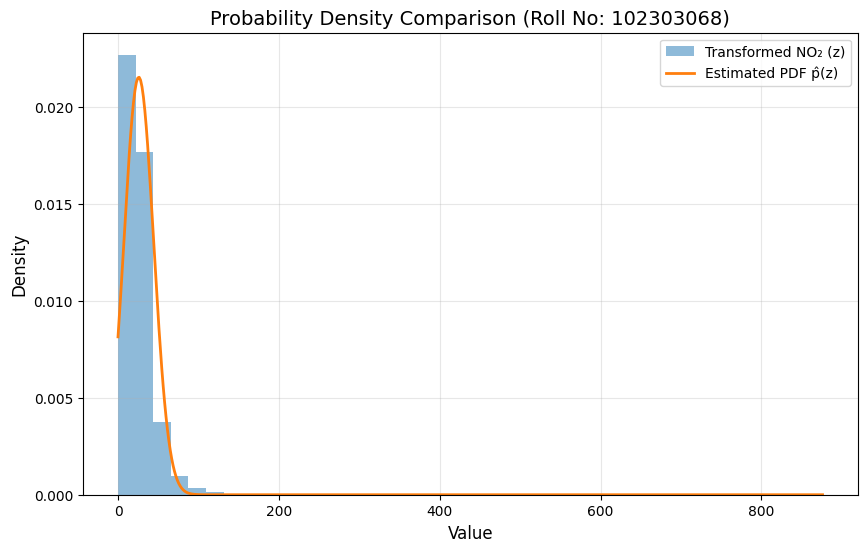

In [15]:
# Range for smooth Gaussian curve
z_range = np.linspace(min(z), max(z), 500)

# Gaussian PDF
pdf = c * np.exp(-lam * (z_range - mu) ** 2)

# Plot
plt.figure(figsize=(10, 6))

# Histogram of transformed data
plt.hist(z, bins=40, density=True, alpha=0.5, label="Transformed NO₂ (z)")

# Gaussian curve
plt.plot(z_range, pdf, linewidth=2, label="Estimated PDF p̂(z)")

# Labels and title
plt.title("Probability Density Comparison (Roll No: 102303068)", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Legend and grid
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


## Final Outcome

The environmental NO₂ data was successfully transformed using a roll-number-parameterized non-linear function and modeled with a Gaussian probability density function.

The learned parameters **(μ, λ, c)** characterize the statistical behavior of the transformed distribution and demonstrate the effectiveness of **Maximum Likelihood Estimation** for real-world environmental sensor data.

